In [997]:

import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import pandas as pd

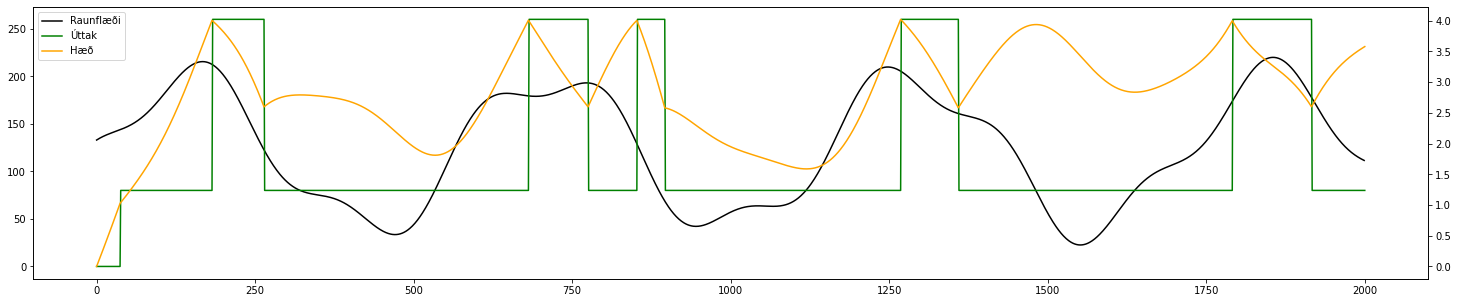

In [619]:
true_flow = 120 + np.sin(np.linspace(15,75,2000))*20 + np.sin(np.linspace(0,22,2000))*80

outputs = []
heights = []

curr_height = 0
curr_output = 0

outputs.append(curr_output)
heights.append(curr_height)
emptying = False
indexes = list(range(len(true_flow)))

differences = []

for i in indexes:
    
    curr_height = heights[-1]
    if curr_height > 4:
        output = 260
        emptying = True
    if curr_height <2.6:
        emptying = False
        output = 80       
             
    if curr_height < 1:
        output = 0
    
    height_change = (true_flow[i] - output) / 5000
    
    outputs.append(output)
    heights.append(heights[-1] + height_change)
    
    #For debugging
    recon_flow = height_change * 5000 + output
    differences.append(true_flow[i] - recon_flow)
    
    # assert true_flow[i] == (height_change * 5000) + output
    
plt.figure(figsize=(25,5))
[a] = plt.plot(true_flow,color='black')
[b] = plt.plot(outputs, color='green')
[c] = plt.twinx().plot(heights,color='orange')
# plt.xlim(0,500)
plt.legend([a,b,c], ['Raunflæði','Úttak','Hæð'])

outputs = np.array(outputs[1:])
heights = np.array(heights[1:])
indexes = np.array(indexes)

In [1392]:
agg_number = 20
flow = true_flow.reshape(-1,agg_number).mean(axis=1)
indx = indexes.reshape(-1,agg_number).mean(axis=1)
outp = outputs.reshape(-1,agg_number).mean(axis=1)
heig = heights.reshape(-1,agg_number).mean(axis=1)


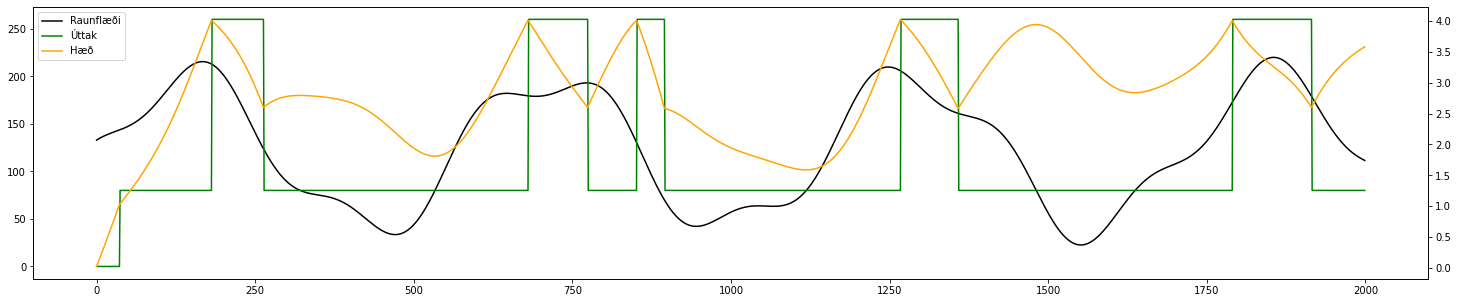

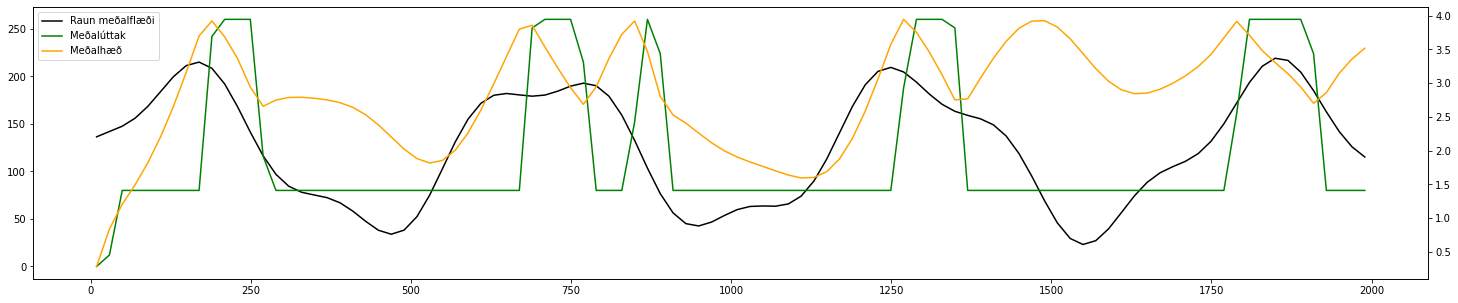

In [1393]:
plt.figure(figsize=(25,5))
[a] = plt.plot(true_flow,color='black')
[b] = plt.plot(outputs, color='green')
[c] = plt.twinx().plot(heights,color='orange')
# plt.xlim(0,500)
plt.legend([a,b,c], ['Raunflæði','Úttak','Hæð'])



plt.figure(figsize=(25,5))
[a] = plt.plot(indx,flow,color='black')
[b] = plt.plot(indx,outp, color='green')
[c] = plt.twinx().plot(indx,heig,color='orange')
# plt.xlim(0,500)
plt.legend([a,b,c], ['Raun meðalflæði','Meðalúttak','Meðalhæð'])




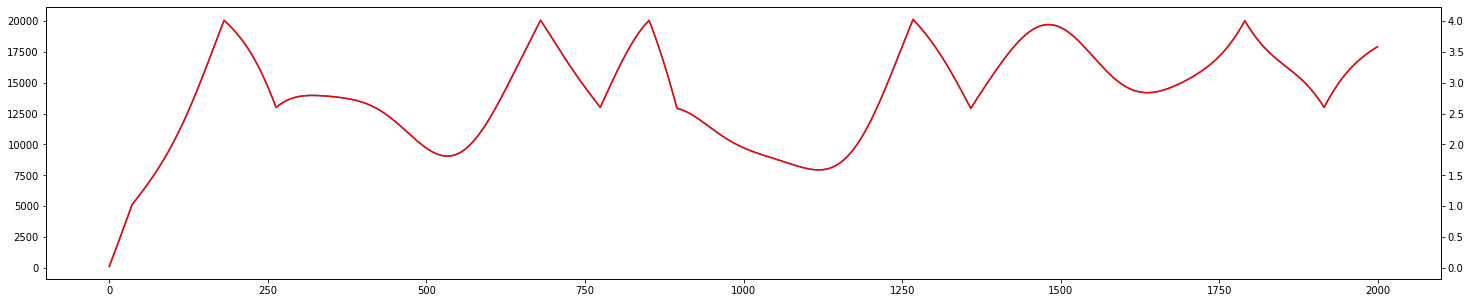

In [1402]:
plt.figure(figsize=(25,5))
plt.plot(np.cumsum(true_flow - outputs))
plt.twinx().plot(heights,color='red')
# plt.plot(heights*5000)

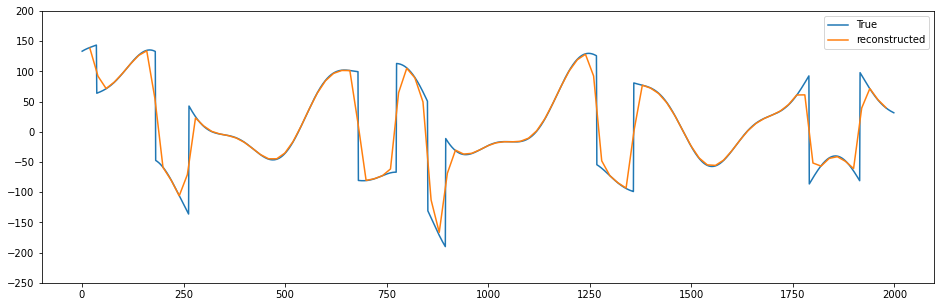

In [1396]:


def interpolate_reindex(input_values, input_index, output_index):    
    interpolator = interpolate.interp1d(input_index,input_values,kind = 'linear',fill_value='extrapolate')
    new_values = interpolator(output_index)
    new_series = pd.Series(new_values, output_index)
    
    return new_series




weights = np.r_[np.full(values_0.shape,1),
                np.full(values_1.shape,1),
                np.full(heig.shape,00)]

diff = interpolate_reindex(np.diff(heig) * 5000 / agg_number, indx[1:]-agg_number/2, indx[1:]-agg_number/2)
differences = interpolate_reindex(np.diff(heights)*5000, indexes[1:]-1/2, indexes[1:]-1/2)


plt.figure(figsize=(16,5))
# Actual
plt.plot(differences.index,differences)
plt.plot(diff.index, diff,)
plt.legend(['True','reconstructed','with minmax'])
# plt.xlim(0,250)
plt.ylim(-250,200)
plt.show()

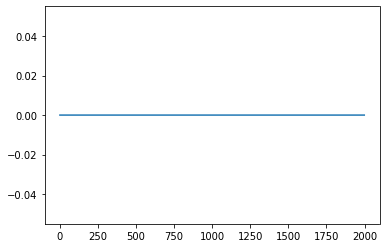

In [1003]:
plt.plot(differences_smooth - np.diff(heights)*5000)

ValueError: operands could not be broadcast together with shapes (100,) (80,) 

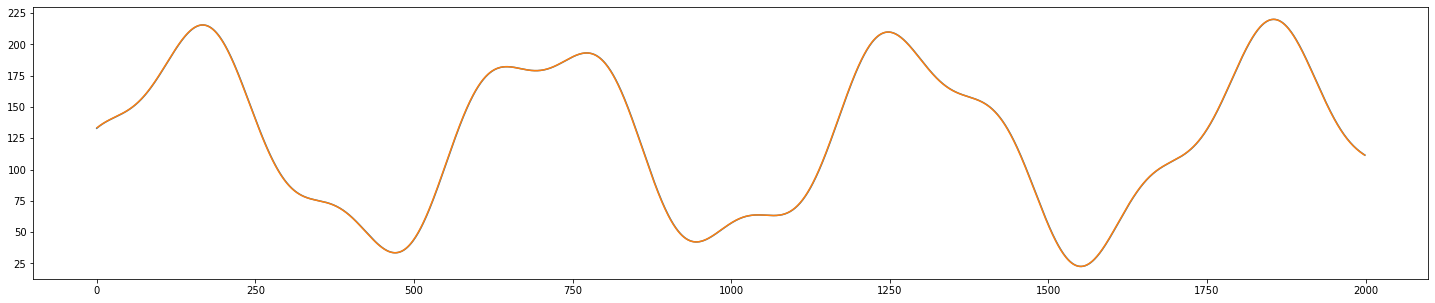

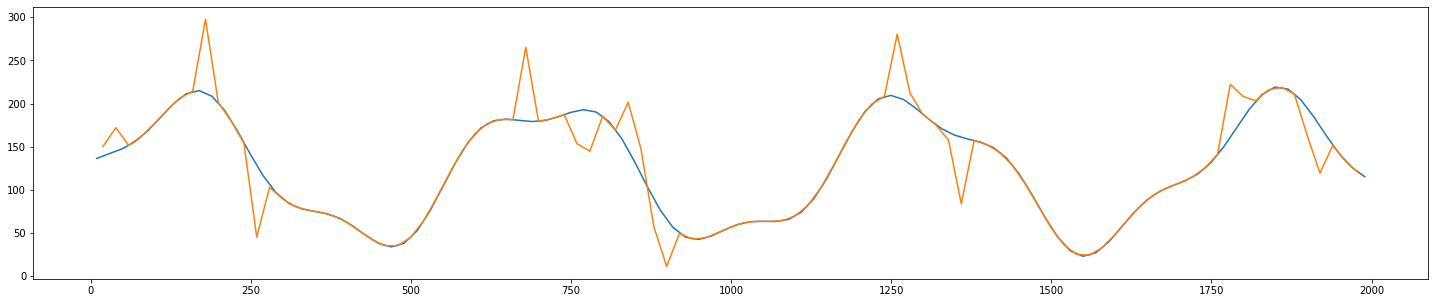

In [1397]:

plt.figure(figsize=(25,5))
plt.plot(indexes,true_flow)
plt.plot(reconstructed.index,outputs[1:] + differences.values)
# plt.xlim(-10,50)


plt.figure(figsize=(25,5))
plt.plot(indx,flow)
plt.plot(diff.index,outp[1:] + diff)
plt.plot(indx,outp + diff_final*5000)
# plt.xlim(-10,50)
# plt.xlim(0,500)



In [1398]:
# plt.figure(figsize=(15,5))
# plt.plot(indexes,heights/50)
# plt.plot(indexes[1:],np.roll(np.diff(heights),-1))
# # plt.plot(indexes[2:],np.diff(np.diff(heights)))
# plt.legend(['height','height change','height acceleration'])
# #####

# plt.figure(figsize=(15,5))
# plt.step(indx,heig,where='mid')
# plt.step(indx[1:],np.roll(np.diff(heig),-1),where='mid')
# # plt.plot(indx[2:],np.diff(np.diff(heig)))
# plt.legend(['height','height change','height acceleration'])

diff

19.5      138.282225
39.5       91.974970
59.5       71.638943
79.5       82.170808
99.5       96.473867
             ...    
1899.5    -60.812050
1919.5     39.356215
1939.5     71.577177
1959.5     53.108109
1979.5     39.856384
Length: 99, dtype: float64

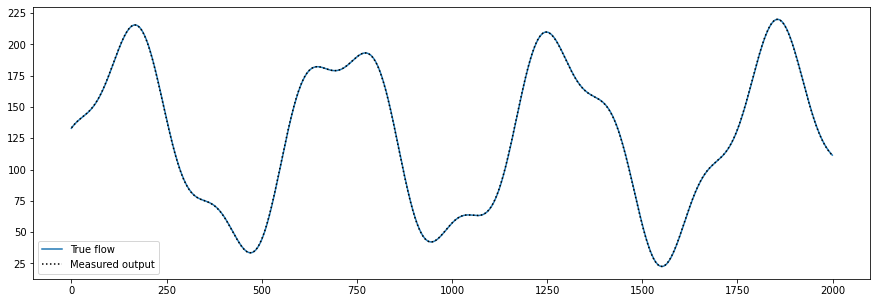

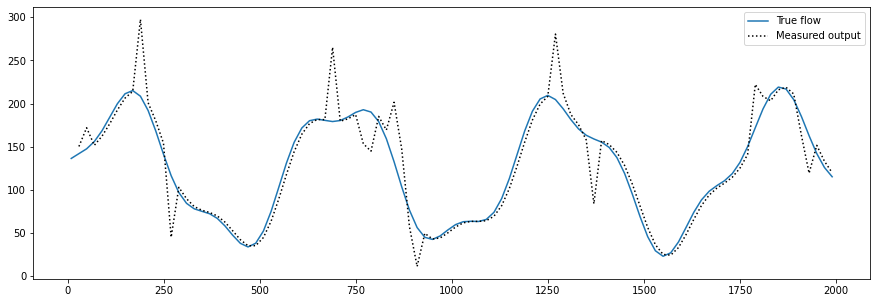

In [1399]:

plt.figure(figsize=(15,5))
plt.plot(true_flow)
# plt.plot(outputs)
# plt.plot(np.diff(heights) * 5000)
plt.plot(indexes[1:] - 0.5, outputs[1:] + np.diff(heights) * 5000,linestyle = 'dotted',color='black')

plt.legend(['True flow','Measured output','Resovour height','output'])
### 

recon = outp[1:] + diff[indx[1:] - agg_number/2]

# recon = outp[1:] + np.diff(heig) * 5000 / agg_number
# recon = pd.Series(recon).rolling(3,min_periods=1,center=True).mean()


plt.figure(figsize=(15,5))
plt.plot(indx,flow,
        #  where='mid'
         )
# plt.plot(indx,outp,
#          where='mid'
#          )
# plt.plot(indx[1:],np.diff(heig) * 5000 / agg_number,
#          where='mid'
#          )
plt.plot(indx[1:],recon,linestyle = 'dotted',color='black',
        #  where='mid'
         )
# plt.vlines(indx[1:][np.argwhere(np.diff(np.diff(heig) > 0))],0,250,color='red',linestyle='--')
plt.legend(['True flow','Measured output','Resovour height','estimated output'])
# plt.xlim(100,300)



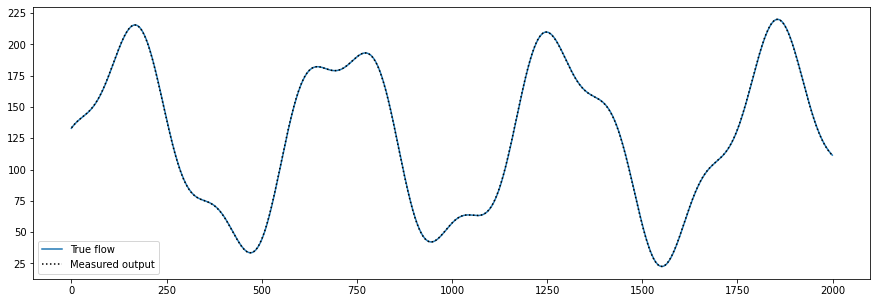

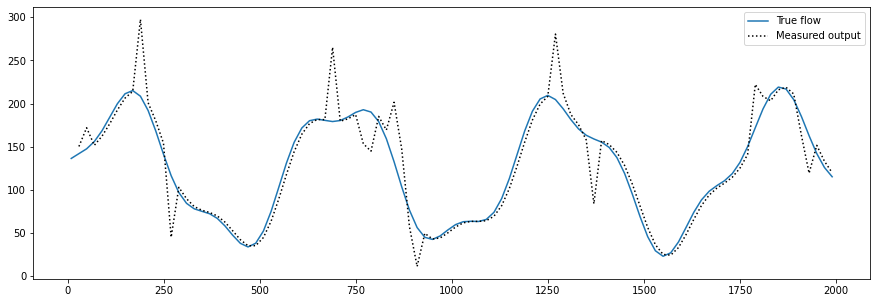

In [1401]:

plt.figure(figsize=(15,5))
plt.plot(true_flow)
# plt.plot(outputs)
# plt.plot(np.diff(heights) * 5000)
plt.plot(indexes[1:] - 0.5, outputs[1:] + np.diff(heights) * 5000,linestyle = 'dotted',color='black')

plt.legend(['True flow','Measured output','Resovour height','output'])
### 

recon = outp + reconstructed[indx]

# recon = outp[1:] + np.diff(heig) * 5000 / agg_number
# recon = pd.Series(recon).rolling(3,min_periods=1,center=True).mean()


plt.figure(figsize=(15,5))
plt.plot(indx,flow,
        #  where='mid'
         )
# plt.plot(indx,outp,
#          where='mid'
#          )
# plt.plot(indx[1:],np.diff(heig) * 5000 / agg_number,
#          where='mid'
#          )
plt.plot(indx,recon,linestyle = 'dotted',color='black',
        #  where='mid'
         )
# plt.vlines(indx[1:][np.argwhere(np.diff(np.diff(heig) > 0))],0,250,color='red',linestyle='--')
plt.legend(['True flow','Measured output','Resovour height','estimated output'])
# plt.xlim(100,300)



(100.0, 300.0)

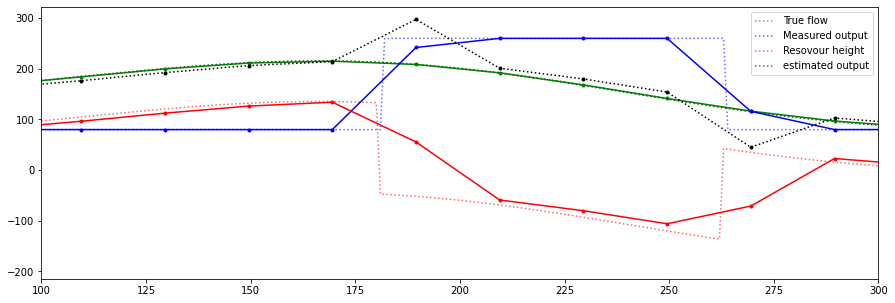

In [528]:
# reconstructed = outputs[1:] + np.diff(heights) * 5000

alpha = 0.6
plt.figure(figsize=(15,5))
plt.plot(true_flow,linestyle = 'dotted',alpha=alpha,color='green')
plt.plot(outputs,linestyle = 'dotted',alpha=alpha,color='blue')
plt.plot(np.diff(heights) * 5000,linestyle = 'dotted',alpha=alpha,color='red')
plt.plot(reconstructed,color='black',linestyle = 'dotted',alpha=alpha)


recon = outp[1:] + np.diff(heig) * 5000 / agg_number
# recon = pd.Series(recon).rolling(3,min_periods=1,center=True).mean()


plt.plot(indx,flow,marker='.',color='green')
plt.plot(indx,outp,marker='.',color='blue')
plt.plot(indx[1:],np.diff(heig) * 5000 / agg_number,marker='.',color='red')
plt.plot(indx[1:],recon,linestyle = 'dotted',color='black',marker='.')
plt.legend(['True flow','Measured output','Resovour height','estimated output'])
plt.xlim(100,300)



Difference: 0.0


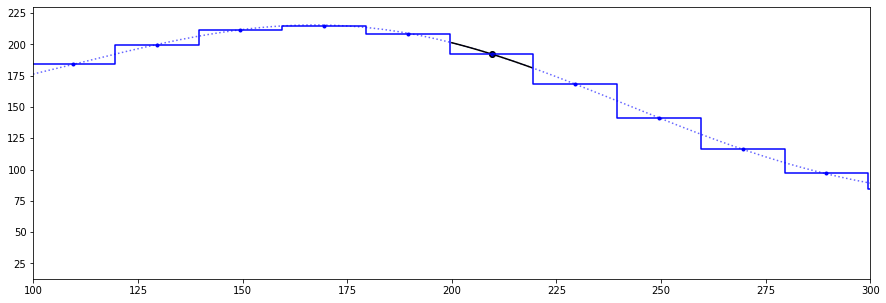

In [559]:
reconstructed = outputs + (true_flow) 

alpha = 0.6

plt.figure(figsize=(15,5))

diff_tmp = (true_flow) 
diff_reshaped_tmp = diff_tmp.reshape(-1,agg_number)
indexes_reshaped_tmp = indexes.reshape(-1,agg_number)

recon = outp + (flow) 


# Full resolution
plt.plot(indexes,diff_tmp,linestyle = 'dotted',alpha=alpha,color='blue')

# Selected chunk and mean
plt.plot(indexes_reshaped_tmp[10],diff_reshaped_tmp[10],color='black')
plt.scatter(indexes_reshaped_tmp[10].mean(),diff_reshaped_tmp[10].mean(),color='black')


plt.step(indx,(flow)   ,color='blue',where='mid')
plt.scatter(indx,(flow)   ,marker='.',color='blue')
plt.xlim(100,300)

print('Difference:',diff_reshaped_tmp[10].mean() - flow[10])



Difference: 0.0


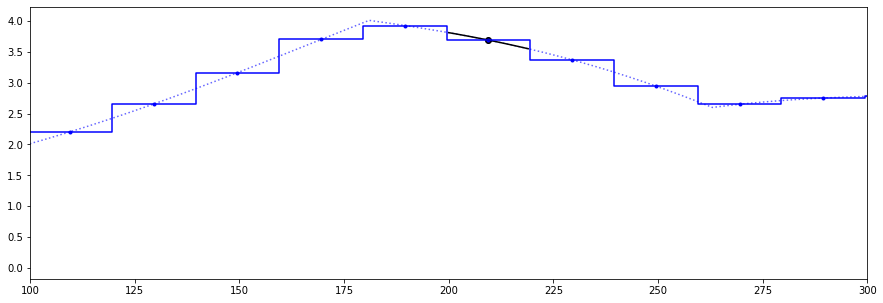

In [558]:
reconstructed = outputs + (heights) 

alpha = 0.6

plt.figure(figsize=(15,5))

diff_tmp = (heights) 
diff_reshaped_tmp = diff_tmp.reshape(-1,agg_number)
indexes_reshaped_tmp = indexes.reshape(-1,agg_number)

recon = outp + (heig) 


# Full resolution
plt.plot(indexes,diff_tmp,linestyle = 'dotted',alpha=alpha,color='blue')

# Selected chunk and mean
plt.plot(indexes_reshaped_tmp[10],diff_reshaped_tmp[10],color='black')
plt.scatter(indexes_reshaped_tmp[10].mean(),diff_reshaped_tmp[10].mean(),color='black')


plt.step(indx,(heig)   ,color='blue',where='mid')
plt.scatter(indx,(heig)   ,marker='.',color='blue')
plt.xlim(100,300)

print('Difference:',diff_reshaped_tmp[10].mean() - heig[10])



Difference: -0.0018103373151029823


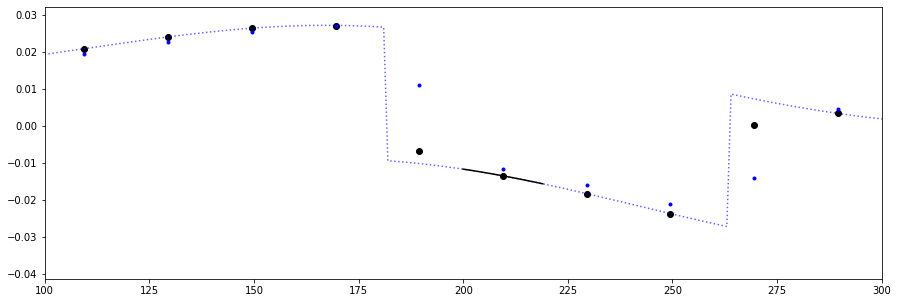

In [610]:
alpha = 0.6

plt.figure(figsize=(15,5))


original = np.diff(heights,prepend=0)
original_reshaped = original.reshape(-1,agg_number)

indexes_reshaped = indexes.reshape(-1,agg_number)

aggregated = np.diff(heig,prepend=0) / agg_number

# Full resolution
plt.plot(indexes,original,linestyle = 'dotted',alpha=alpha,color='blue')

# Selected chunk and mean
plt.plot(indexes_reshaped[10],original_reshaped[10],color='black')
# plt.scatter(indexes_reshaped[10].mean(),original_reshaped[10].mean(),color='black')
plt.scatter(indexes_reshaped.mean(axis=1),original_reshaped.mean(axis=1),color='black')


# plt.step(indx, aggregated   ,color='blue',where='pre')
plt.scatter(indx, aggregated  ,marker='.',color='blue')
plt.xlim(100,300)

print('Difference:',original_reshaped[10].mean() - aggregated[10])



In [612]:
indexes_reshaped.mean(axis=1),indx
original_reshaped.mean(axis=1)[:10],aggregated[:10]

(array([ 0.02728329,  0.02599788,  0.01350994,  0.01518953,  0.01768789,
         0.02080917,  0.02394617,  0.02626933,  0.02700386, -0.00670112]),
 array([0.01421333, 0.02765644, 0.01839499, 0.01432779, 0.01643416,
        0.01929477, 0.02248785, 0.02526875, 0.02681241, 0.0111047 ]))

In [573]:
diff_reshaped_tmp[10],np.diff(heig)[10]*5000/50

(array([-58.67198361, -59.53259053, -60.41570162, -61.32093505,
        -62.24789505, -63.19617227, -64.16534404, -65.1549747 ,
        -66.16461597, -67.1938073 , -68.2420762 , -69.30893863,
        -70.39389937, -71.49645244, -72.61608145, -73.75226006,
        -74.90445234, -76.07211326, -77.25468904, -78.45161766]),
 -32.03936193918198)

In [477]:
print('MAE reconstruction from raw data:',np.mean(np.abs(reconstructed - true_flow[1:])))
print('MAE reconstruction from aggregated data:',np.mean(np.abs(recon - flow[1:])))
print('MAE using observed:',np.mean(np.abs(outp - flow)))


MAE reconstruction from raw data: 5.040659124606081e-13
MAE reconstruction from aggregated data: 13.12308319149838
MAE using observed: 55.67024588926555


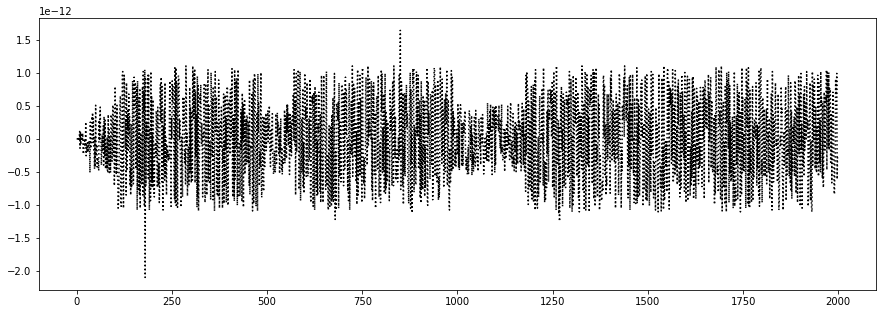

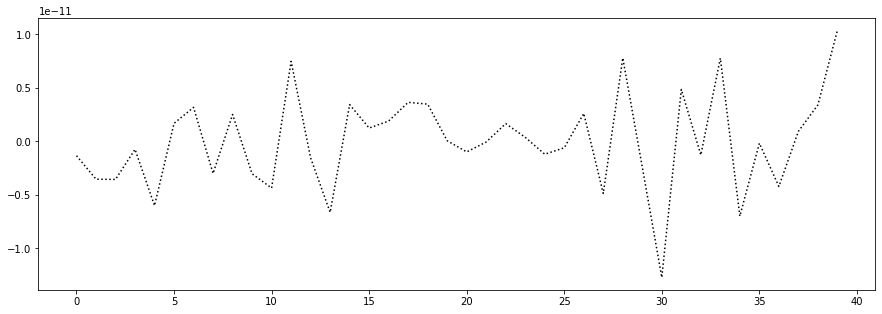

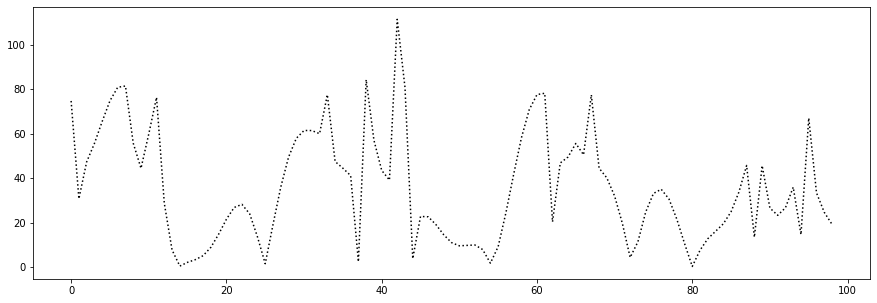

In [478]:
flow_est = outputs[1:] + np.diff(heights) * 5000

plt.figure(figsize=(15,5))
plt.plot(true_flow[1:] - flow_est,linestyle = 'dotted',color='black')

####

difference = true_flow[1:] - flow_est
# abs_difference = np.abs(difference)
difference_rounded = np.r_[0,difference].reshape(-1,50).sum(axis=1)
# difference_rounded = np.r_[0,abs_difference].reshape(-1,50).sum(axis=1)
plt.figure(figsize=(15,5))
plt.plot(difference_rounded,linestyle = 'dotted',color='black')
# plt.plot(difference_rounded)
####

f_est = outp[1:] + np.diff(heig) * 5000 / 50
diff = flow[1:] - f_est
plt.figure(figsize=(15,5))
plt.plot(np.abs(diff),linestyle = 'dotted',color='black')
# plt.twinx().plot(difference_rounded,linestyle = 'dotted',color='orange')



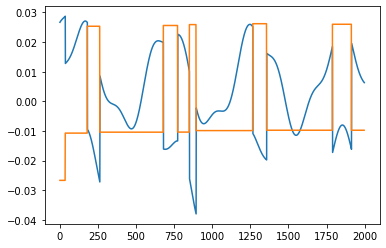

In [479]:
# plt.plot(np.diff(np.diff(heights)))
tmp0 = np.diff(heights)
tmp = np.diff(tmp0)
tmp[np.abs(tmp) >0.01] = 0
# plt.plot(tmp)
plt.plot(tmp0)
plt.plot(np.cumsum(tmp) - tmp0[1:])
# plt.plot(outputs[1:] + (tmp0) * 5000)
# plt.plot(outputs[2:] + np.cumsum(tmp) * 5000)

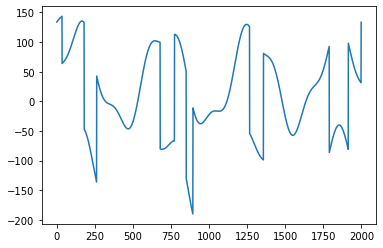

In [480]:
# plt.plot(outputs[1:])
plt.plot(np.roll(np.diff(heights),-1) * 5000)